# World Happiness Report

## Exploratory Data Analysis

### Install dependencies

In [4]:
# Install dependencies that are needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


### Set up variables

In [6]:
# Set the path to the file to load
file_path = "World-happiness-report-updated_2024.csv"
# This dataset can be downloaded from https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

### Load file

In [8]:
# Load csv file into a dataframe - 
# encoding needs to be specified to prevent load error
# see https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/discussion/503024
df = pd.read_csv(file_path, encoding='latin-1')

In [9]:
# Look at first 5 records
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


### Basic Data Exploration

In [11]:
# How many rows and columns in the data set?
df.shape

(2363, 11)

In [12]:
# What are the numeric distributions of our data set?
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [13]:
# What is the data format?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [14]:
# Have we any duplicated rows?
sum(df.duplicated())

0

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Ladder', ylabel='Count'>

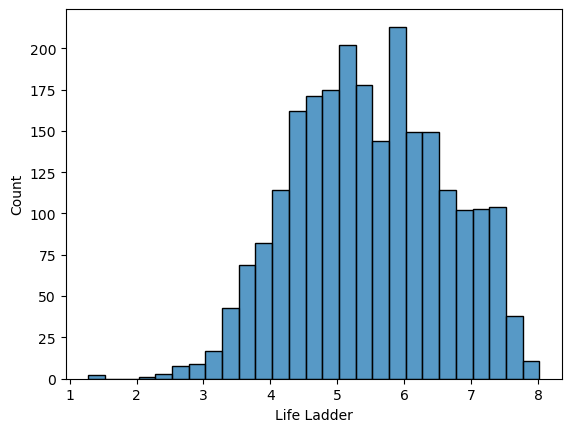

In [15]:
# What is the distribution of the Life Ladder - our target variable?
sns.histplot(data=df, x='Life Ladder')

In [16]:
# Deliving in to the data gaps - how many non-null values per column?
df.notnull().sum()

Country name                        2363
year                                2363
Life Ladder                         2363
Log GDP per capita                  2335
Social support                      2350
Healthy life expectancy at birth    2300
Freedom to make life choices        2327
Generosity                          2282
Perceptions of corruption           2238
Positive affect                     2339
Negative affect                     2347
dtype: int64

In [17]:
# Most null values are in "Perceptions of Corruption" - let's dig in to that
df.loc[df['Perceptions of corruption'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
34,Algeria,2014,6.355,9.355,0.818,65.900,NaN,NaN,NaN,0.558,0.177
35,Algeria,2016,5.341,9.383,0.749,66.100,NaN,NaN,NaN,0.565,0.377
135,Bahrain,2014,6.165,10.802,NaN,65.960,NaN,NaN,NaN,NaN,NaN
136,Bahrain,2015,6.007,10.788,0.853,66.200,0.850,0.106,NaN,0.653,0.303
137,Bahrain,2016,6.170,10.789,0.863,66.125,0.889,0.082,NaN,0.736,0.283
...,...,...,...,...,...,...,...,...,...,...,...
2305,Vietnam,2015,5.076,8.999,0.849,64.900,NaN,0.064,NaN,0.583,0.232
2307,Vietnam,2017,5.175,9.111,NaN,65.100,NaN,NaN,NaN,NaN,NaN
2314,Yemen,2007,4.477,8.212,0.825,58.720,0.673,0.006,NaN,0.524,0.379
2322,Yemen,2016,3.826,7.552,0.775,58.175,0.533,-0.144,NaN,0.401,0.228


In [18]:
# How many rows would be dropped if we dropped all na values?
print(f"Would drop {df.shape[0] - df.dropna().shape[0]} rows - which is {(df.shape[0] - df.dropna().shape[0]) / df.shape[0]:.2%} ")

Would drop 266 rows - which is 11.26% 


In [19]:
# Let's explore the rows with blanks a bit more by putting them in their own df
df_nona = df.dropna() # this df has no na values
df_with_na = df[df.isna().any(axis=1)] # this df contains only rows with an na value
print(df_nona.shape)
print(df_with_na.shape)

(2097, 11)
(266, 11)


In [20]:
df_with_na.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
14,Afghanistan,2023,1.446,NaN,0.368,55.200,0.228,NaN,0.738,0.261,0.460
31,Algeria,2010,5.464,9.306,NaN,65.500,0.593,-0.212,0.618,NaN,NaN
34,Algeria,2014,6.355,9.355,0.818,65.900,NaN,NaN,NaN,0.558,0.177
35,Algeria,2016,5.341,9.383,0.749,66.100,NaN,NaN,NaN,0.565,0.377


In [21]:
# How many unique countries in each data set?
n = len(pd.unique(df['Country name']))
n_na = len(pd.unique(df_with_na['Country name']))
n_nona = len(pd.unique(df_nona['Country name']))

print("Full data set unique countries", n)
print("Complete data only unique countries", n_nona)
print("Unique countries missing data", n_na)


Full data set unique countries 165
Complete data only unique countries 155
Unique countries missing data 73


In [22]:
# So there are 10 countries with no complete data for any year - which are they?
all_countries = pd.unique(df['Country name'])
nona_countries = pd.unique(df_nona['Country name'])

# Find the missing values in nono countries
missing_values = [item for item in all_countries if item not in nona_countries]

# Print the missing values
print("Missing values:", missing_values)

Missing values: ['China', 'Cuba', 'Hong Kong S.A.R. of China', 'Kosovo', 'Maldives', 'Oman', 'Somaliland region', 'South Sudan', 'State of Palestine', 'Turkmenistan']


In [23]:
# Makes sense to drop these completely from our data set
# Let's create a new datafram without those countries
df_working = df[~df['Country name'].isin(missing_values)]
print("Countries now in data set ", len(pd.unique(df_working['Country name'])))

Countries now in data set  155


In [24]:
# Now let's re-create the split data sets and explore the other missing data
df_nona = df_working.dropna() # this df has no na values
df_with_na = df_working[df_working.isna().any(axis=1)] # this df contains only rows with an na value
print(df_working.shape)
print(df_nona.shape)
print(df_with_na.shape)

(2279, 11)
(2097, 11)
(182, 11)


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

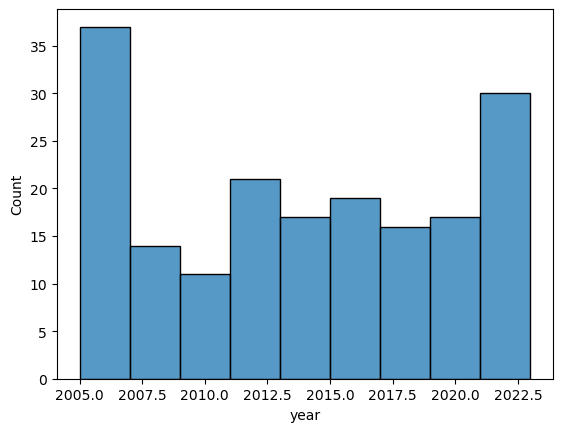

In [25]:
# Let's have a look at the distribution by year of the missing data
sns.histplot(data=df_with_na, x='year')

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

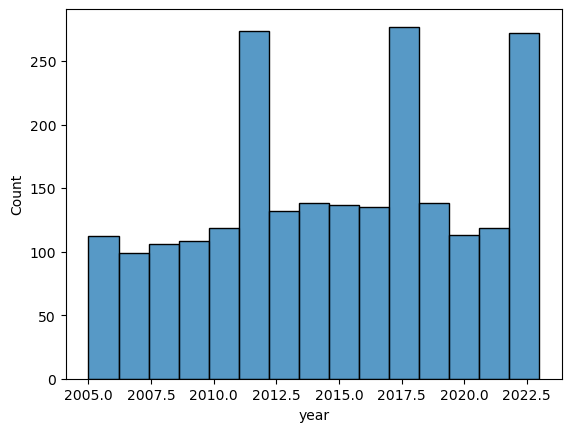

In [26]:
# Compare to full data set
sns.histplot(data=df_working, x='year')

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

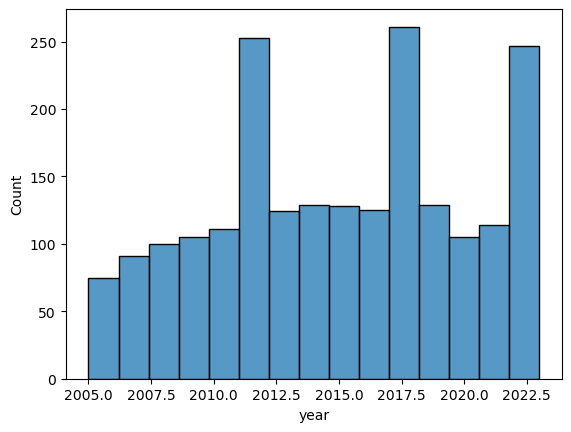

In [27]:
# And data set with nas removed
sns.histplot(data=df_nona, x='year')

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


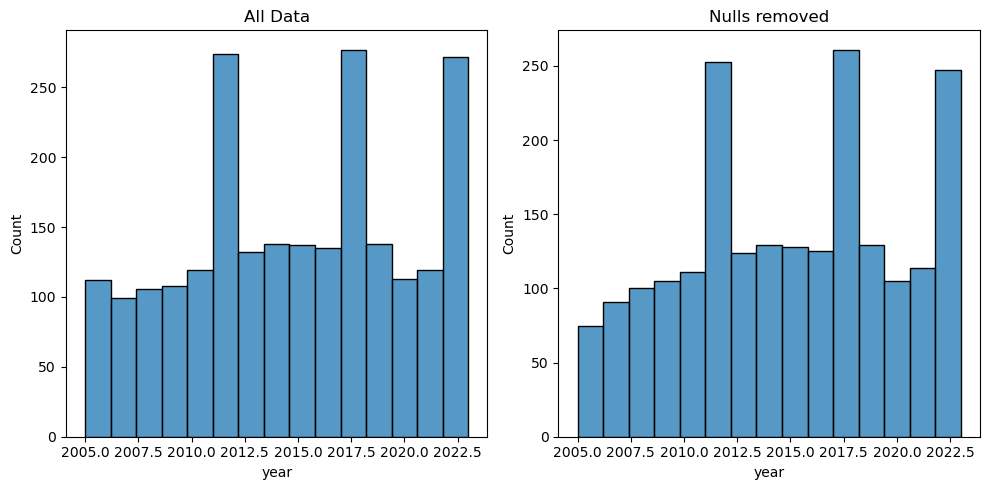

In [28]:
# Create the combined plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df_working, x='year', ax=axes[0])
axes[0].set_title('All Data')

sns.histplot(data=df_nona, x='year', ax=axes[1])
axes[1].set_title('Nulls removed')

plt.tight_layout()
plt.show()

In [29]:
# So in general the data set with nulls removed resembles the overall data set, with more noticeable variations in 2005 and 2022. 
# Will continue EDA with the full data set, but also considered removing the 2005 data

In [30]:
# Let's look at the distribution of the variables using box plots

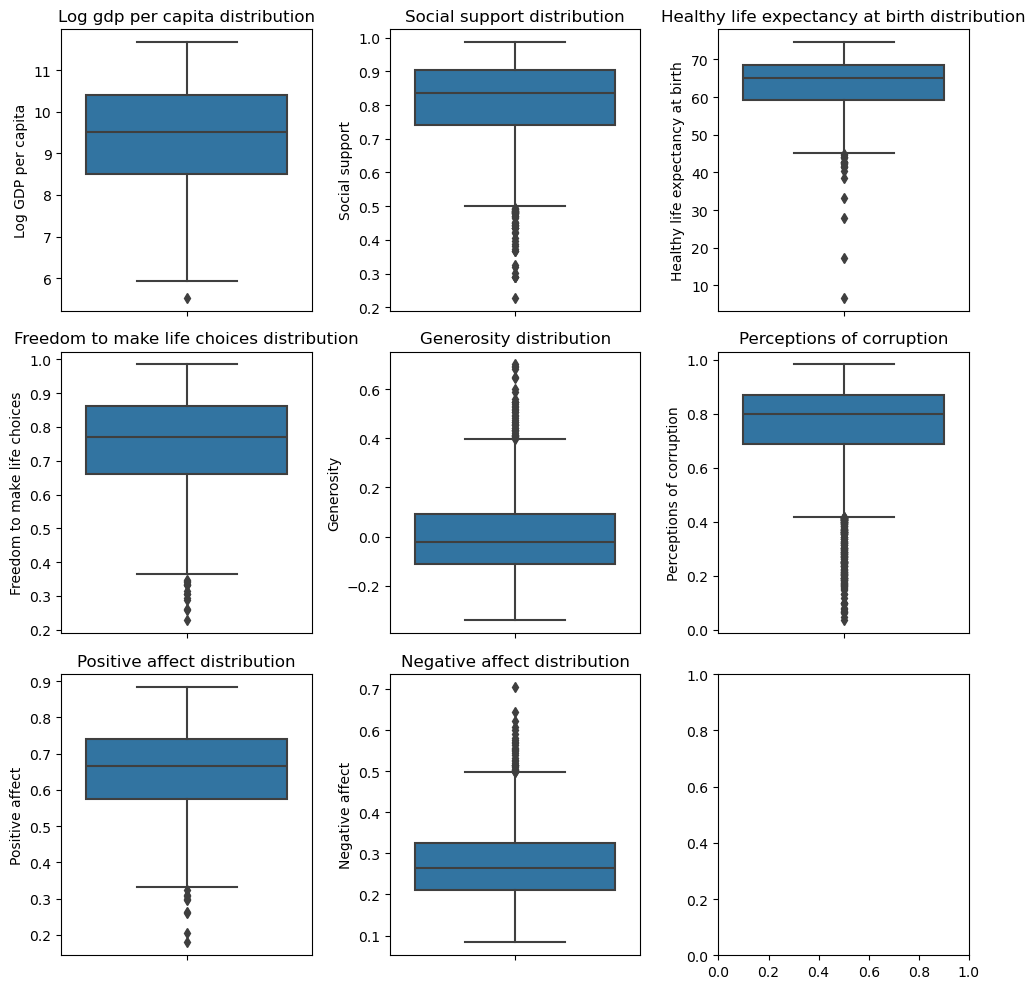

In [31]:
# Create the combined plot
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(y="Log GDP per capita", data=df_working, ax=axes[0,0])
axes[0,0].set_title('Log gdp per capita distribution')

sns.boxplot(y="Social support", data=df_working, ax=axes[0,1])
axes[0,1].set_title('Social support distribution')

sns.boxplot(y="Healthy life expectancy at birth", data=df_working, ax=axes[0,2])
axes[0,2].set_title('Healthy life expectancy at birth distribution')

sns.boxplot(y="Freedom to make life choices", data=df_working, ax=axes[1,0])
axes[1,0].set_title('Freedom to make life choices distribution')

sns.boxplot(y="Generosity", data=df_working, ax=axes[1,1])
axes[1,1].set_title('Generosity distribution')

sns.boxplot(y="Perceptions of corruption", data=df_working, ax=axes[1,2])
axes[1,2].set_title('Perceptions of corruption')

sns.boxplot(y="Positive affect", data=df_working, ax=axes[2,0])
axes[2,0].set_title('Positive affect distribution')

sns.boxplot(y="Negative affect", data=df_working, ax=axes[2,1])
axes[2,1].set_title('Negative affect distribution')


plt.tight_layout()
plt.show()

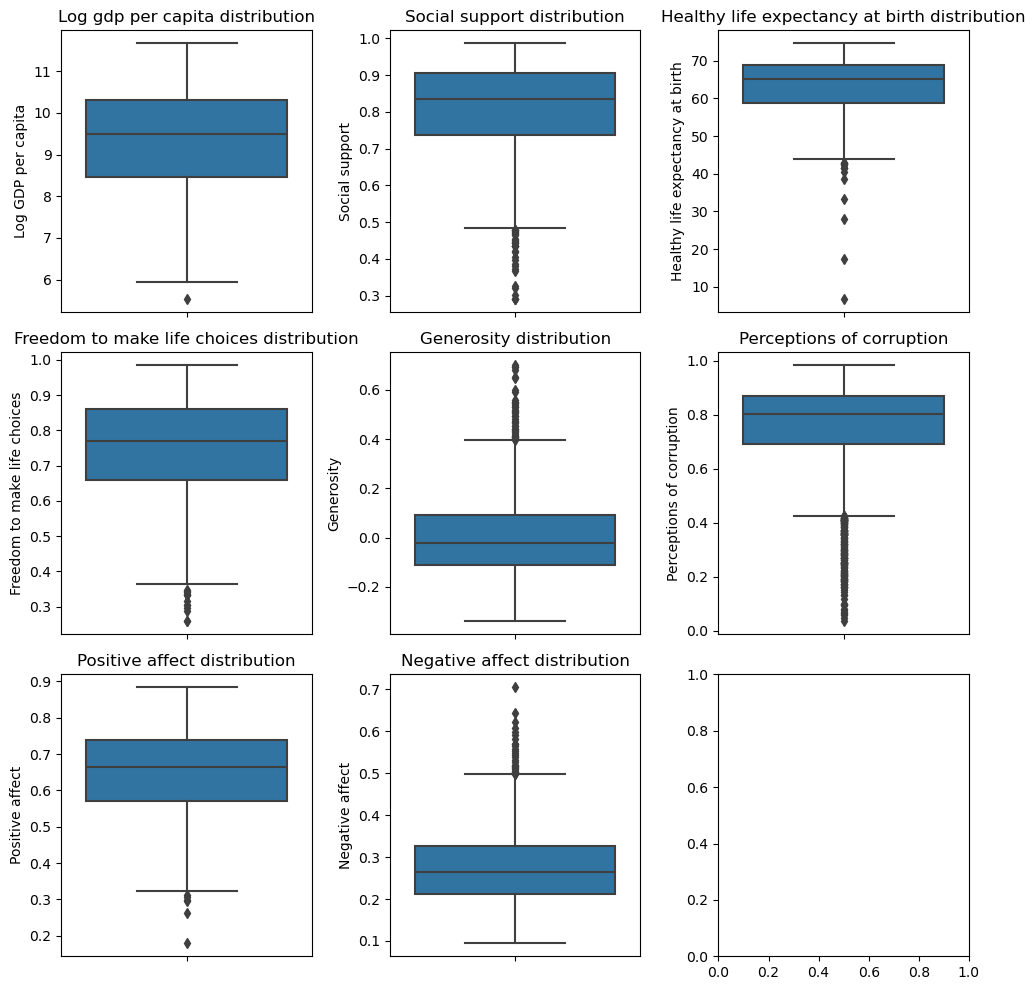

In [32]:
# Compare to the data with all null values removed
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(y="Log GDP per capita", data=df_nona, ax=axes[0,0])
axes[0,0].set_title('Log gdp per capita distribution')

sns.boxplot(y="Social support", data=df_nona, ax=axes[0,1])
axes[0,1].set_title('Social support distribution')

sns.boxplot(y="Healthy life expectancy at birth", data=df_nona, ax=axes[0,2])
axes[0,2].set_title('Healthy life expectancy at birth distribution')

sns.boxplot(y="Freedom to make life choices", data=df_nona, ax=axes[1,0])
axes[1,0].set_title('Freedom to make life choices distribution')

sns.boxplot(y="Generosity", data=df_nona, ax=axes[1,1])
axes[1,1].set_title('Generosity distribution')

sns.boxplot(y="Perceptions of corruption", data=df_nona, ax=axes[1,2])
axes[1,2].set_title('Perceptions of corruption')

sns.boxplot(y="Positive affect", data=df_nona, ax=axes[2,0])
axes[2,0].set_title('Positive affect distribution')

sns.boxplot(y="Negative affect", data=df_nona, ax=axes[2,1])
axes[2,1].set_title('Negative affect distribution')


plt.tight_layout()
plt.show()

In [33]:
# Create a new dataframe with only the numeric fields for correlation analysis
df_corr = df_working.drop(['Country name','year'], axis=1)
df_nona_corr = df_nona.drop(['Country name','year'], axis=1)

In [34]:
df_corr.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.789140,0.725721,0.717737,0.540012,0.171887,-0.444524,0.518254,-0.352795
Log GDP per capita,0.789140,1.000000,0.690095,0.821050,0.360223,-0.011335,-0.343153,0.234712,-0.260756
Social support,0.725721,0.690095,1.000000,0.600209,0.405243,0.060649,-0.223807,0.433889,-0.460785
Healthy life expectancy at birth,0.717737,0.821050,0.600209,1.000000,0.373748,0.019541,-0.303680,0.215027,-0.142817
Freedom to make life choices,0.540012,0.360223,0.405243,0.373748,1.000000,0.320494,-0.471305,0.583755,-0.266469
Generosity,0.171887,-0.011335,0.060649,0.019541,0.320494,1.000000,-0.269249,0.313986,-0.063658
Perceptions of corruption,-0.444524,-0.343153,-0.223807,-0.303680,-0.471305,-0.269249,1.000000,-0.286059,0.268656
Positive affect,0.518254,0.234712,0.433889,0.215027,0.583755,0.313986,-0.286059,1.000000,-0.338988
Negative affect,-0.352795,-0.260756,-0.460785,-0.142817,-0.266469,-0.063658,0.268656,-0.338988,1.000000


<Axes: >

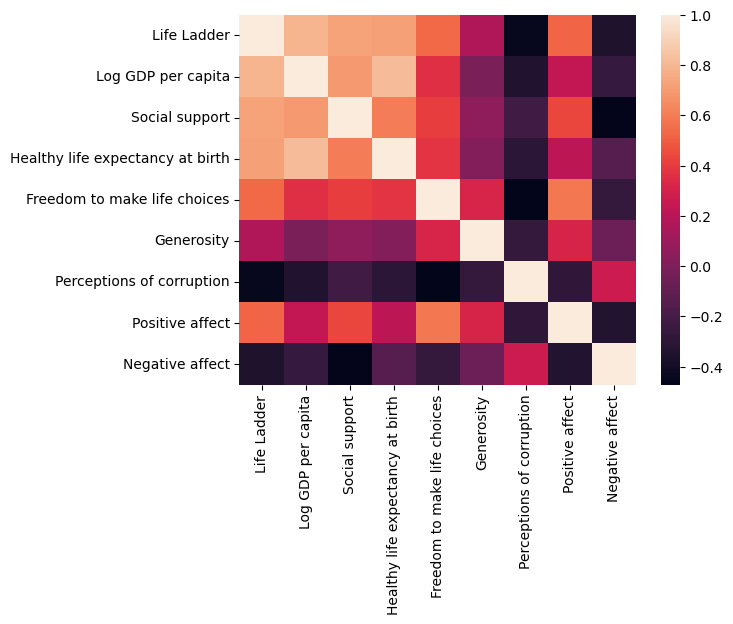

In [35]:
# Visualise the correlation as a heatmap
sns.heatmap(df_corr.corr())

In [36]:
# Let's check the correlation for the dataset with no missing values
df_nona_corr.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.787119,0.724926,0.725240,0.528130,0.162558,-0.451575,0.502195,-0.345540
Log GDP per capita,0.787119,1.000000,0.698991,0.832142,0.349973,-0.024954,-0.352464,0.222983,-0.269526
Social support,0.724926,0.698991,1.000000,0.602120,0.393835,0.055820,-0.223342,0.426118,-0.461781
Healthy life expectancy at birth,0.725240,0.832142,0.602120,1.000000,0.366455,0.011647,-0.307669,0.212074,-0.145164
Freedom to make life choices,0.528130,0.349973,0.393835,0.366455,1.000000,0.312958,-0.474110,0.580845,-0.266494
Generosity,0.162558,-0.024954,0.055820,0.011647,0.312958,1.000000,-0.272704,0.309899,-0.069392
Perceptions of corruption,-0.451575,-0.352464,-0.223342,-0.307669,-0.474110,-0.272704,1.000000,-0.287633,0.274004
Positive affect,0.502195,0.222983,0.426118,0.212074,0.580845,0.309899,-0.287633,1.000000,-0.327993
Negative affect,-0.345540,-0.269526,-0.461781,-0.145164,-0.266494,-0.069392,0.274004,-0.327993,1.000000


<Axes: >

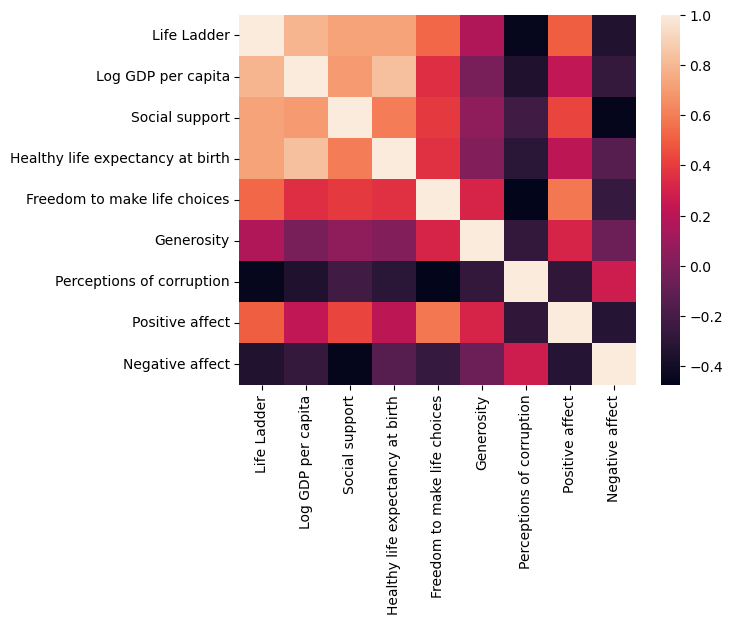

In [37]:
# and visualise it
sns.heatmap(df_nona_corr.corr())

In [38]:
# Let's focus on the three variables that have a correlation of above 0.7 - that is Log GDP per capita, Social support and 
# Healthly life expectancy at birth
# Let's go back to our full data set, narrow down to those variables only, and then remove any rows with blanks in that subset
df_focus = df[["Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth"]]



In [39]:
# Deliving in to the data gaps - how many non-null values per column?
df_focus.notnull().sum()

Life Ladder                         2363
Log GDP per capita                  2335
Social support                      2350
Healthy life expectancy at birth    2300
dtype: int64

In [40]:
# Drop the rows with any na
df_focus_nona = df_focus.dropna()

In [41]:
df_focus_nona.shape

(2270, 4)

<Axes: >

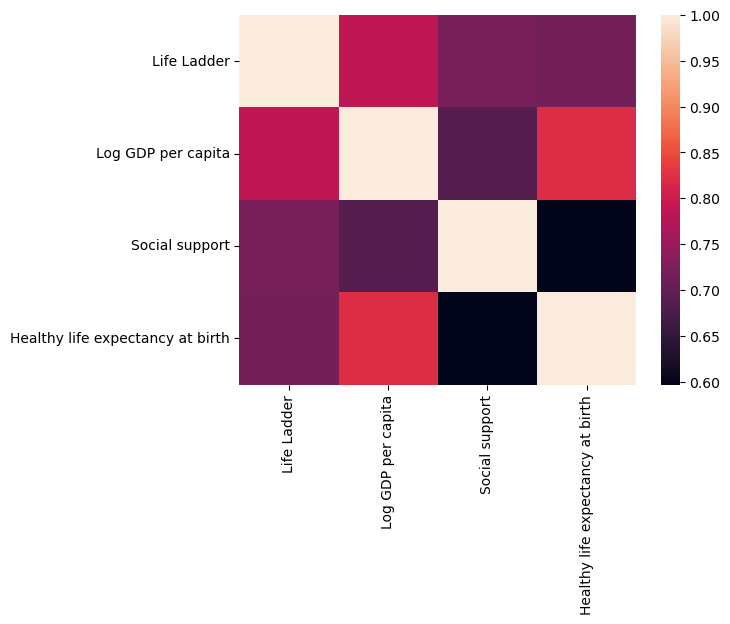

In [42]:
# Let's check that correlation
sns.heatmap(df_focus_nona.corr())

In [43]:
df_focus_nona.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
Life Ladder,1.000000,0.787373,0.721029,0.715064
Log GDP per capita,0.787373,1.000000,0.688059,0.820600
Social support,0.721029,0.688059,1.000000,0.596994
Healthy life expectancy at birth,0.715064,0.820600,0.596994,1.000000


In [85]:
# Save this data set to take into data analysis
df_focus_nona.to_csv('happiness_data.csv', index = False)